<a href="https://colab.research.google.com/github/mrudulaprabhakarsharma/projectupdate/blob/main/Copy_of_Copy_of_diabetes_of_accuracy_82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving xxx.csv to xxx (1).csv


In [ ]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset
dataset = pd.read_csv('xxx.csv')

In [ ]:
# Preview data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,154,74,32,193,29.3,0.839,39,0
1,2,117,90,19,71,25.2,0.313,21,0
2,3,84,72,32,0,37.2,0.267,28,0
3,6,0,68,41,0,39.0,0.727,41,1
4,7,94,64,25,79,33.3,0.738,41,0


In [ ]:
# Dataset dimensions - (rows, columns)
dataset.shape

(299, 9)

In [ ]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               299 non-null    int64  
 1   Glucose                   299 non-null    int64  
 2   BloodPressure             299 non-null    int64  
 3   SkinThickness             299 non-null    int64  
 4   Insulin                   299 non-null    int64  
 5   BMI                       299 non-null    float64
 6   DiabetesPedigreeFunction  299 non-null    float64
 7   Age                       299 non-null    int64  
 8   Outcome                   299 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.1 KB


In [ ]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,299.0,3.936455,3.458184,0.000,1.0000,3.00,6.000,15.000
Glucose,299.0,118.525084,31.425984,0.000,97.0000,115.00,134.000,199.000
BloodPressure,299.0,69.438127,19.499579,0.000,62.0000,72.00,80.000,114.000
SkinThickness,299.0,20.391304,16.139203,0.000,0.0000,23.00,32.000,99.000
Insulin,299.0,76.180602,103.914075,0.000,0.0000,16.00,126.500,600.000
BMI,299.0,31.846488,7.530017,0.000,27.4000,32.00,36.450,57.300
DiabetesPedigreeFunction,299.0,0.436074,0.295361,0.085,0.2225,0.34,0.592,1.699
Age,299.0,33.177258,11.821889,21.000,23.5000,28.00,41.500,70.000
Outcome,299.0,0.307692,0.462312,0.000,0.0000,0.00,1.000,1.000


In [ ]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

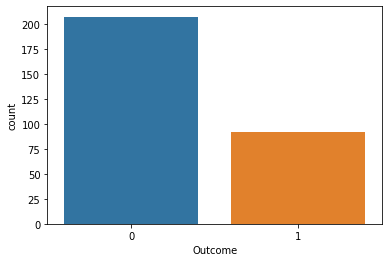

In [ ]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = dataset)

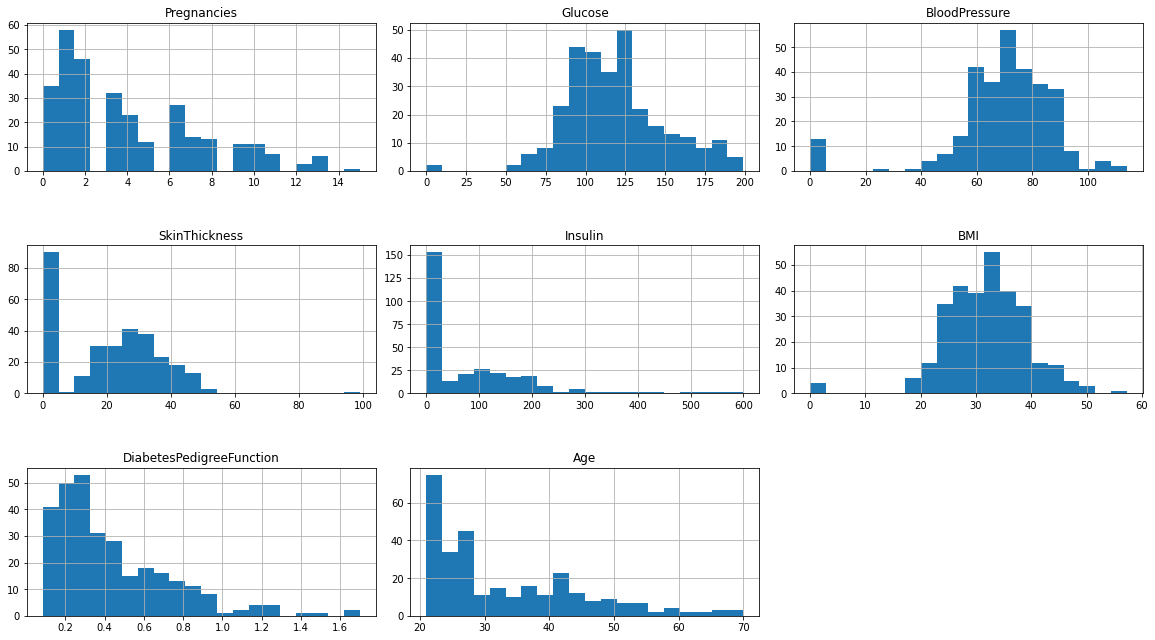

In [ ]:
# Histogram of each feature
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

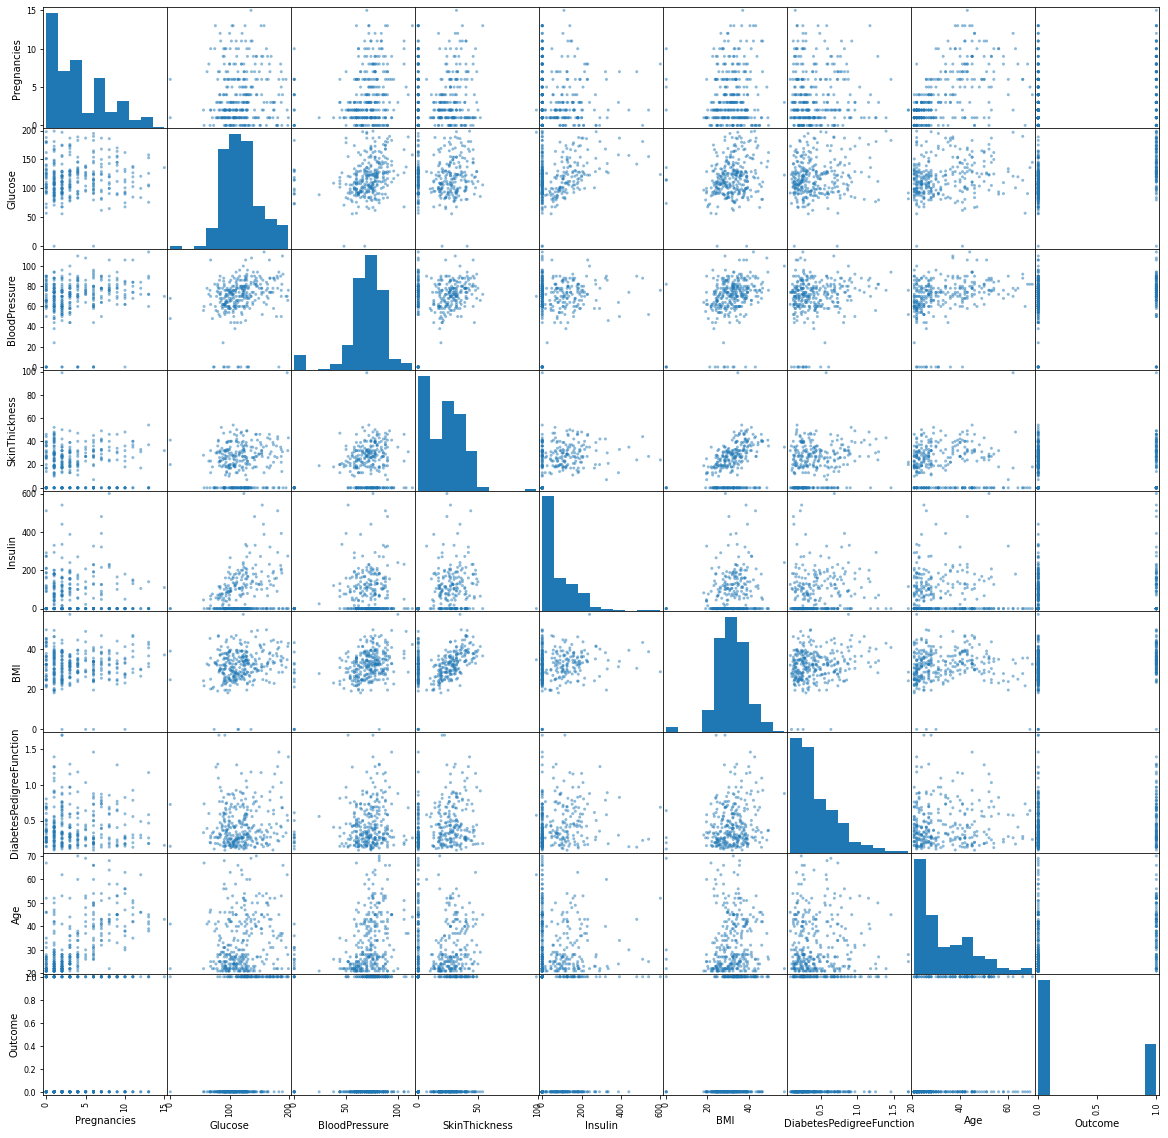

In [ ]:
# Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

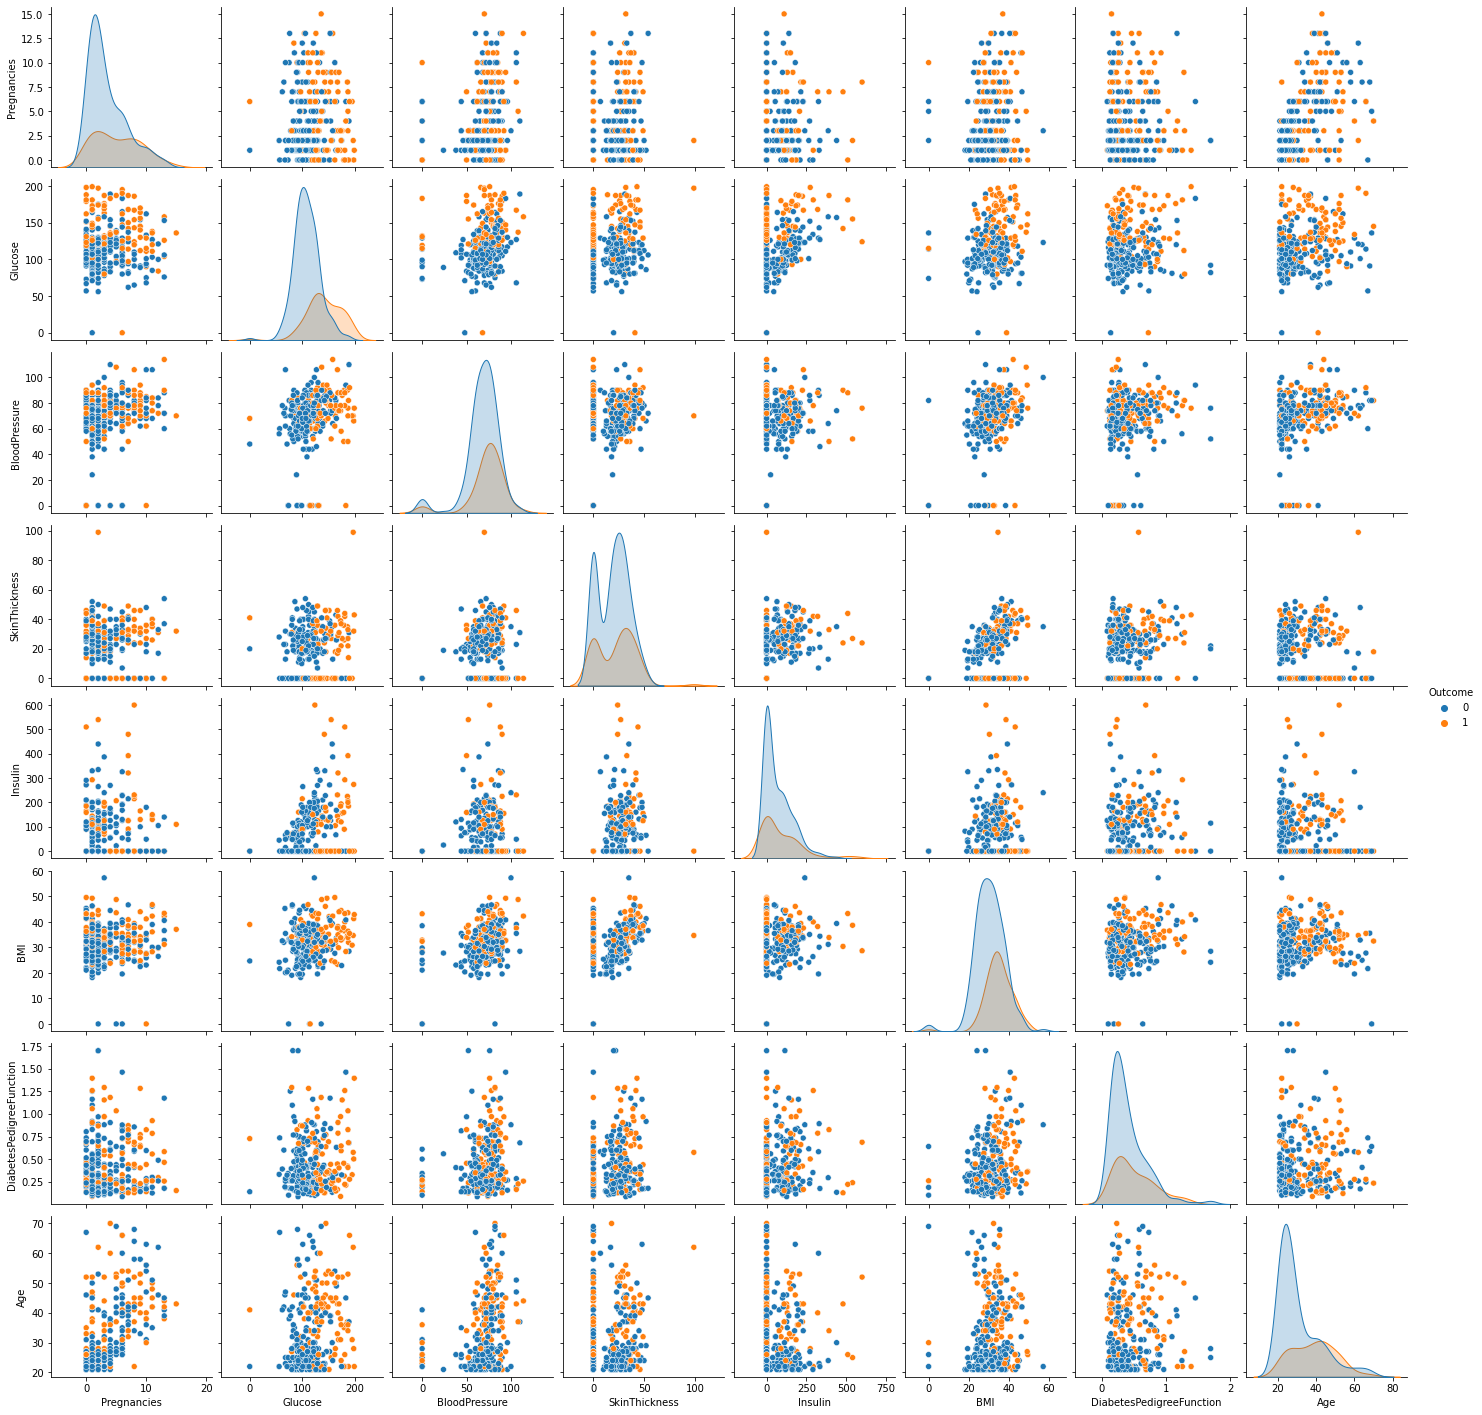

In [ ]:
# Pairplot 
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

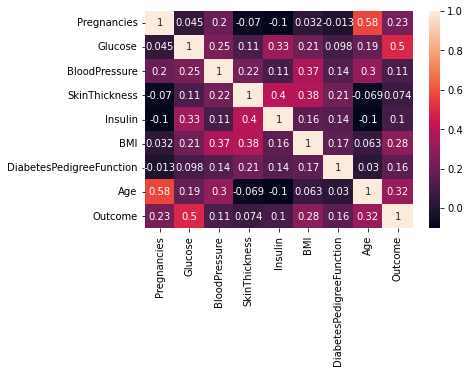

In [ ]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [ ]:
dataset_new = dataset

In [ ]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [ ]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       2
BloodPressure                13
SkinThickness                90
Insulin                     148
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [ ]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,299.0,3.936455,3.458184,0.000,1.0000,3.000000,6.000000,15.000
Glucose,299.0,119.323232,29.877657,56.000,97.5000,116.000000,134.000000,199.000
BloodPressure,299.0,72.594406,12.662229,24.000,64.0000,72.594406,80.000000,114.000
SkinThickness,299.0,29.172249,8.989890,7.000,25.0000,29.172249,32.000000,99.000
Insulin,299.0,150.847682,71.350291,15.000,126.0000,150.847682,150.847682,600.000
BMI,299.0,32.278305,6.550050,18.200,27.6000,32.278305,36.450000,57.300
DiabetesPedigreeFunction,299.0,0.436074,0.295361,0.085,0.2225,0.340000,0.592000,1.699
Age,299.0,33.177258,11.821889,21.000,23.5000,28.000000,41.500000,70.000
Outcome,299.0,0.307692,0.462312,0.000,0.0000,0.000000,1.000000,1.000


In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [ ]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [ ]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [ ]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [ ]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (239, 4)
X_test shape: (60, 4)
Y_train shape: (239,)
Y_test shape: (60,)


In [ ]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

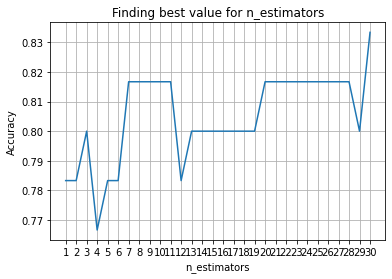

Highest value:  0.8333333333333334


In [ ]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [ ]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [ ]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [ ]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [ ]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [ ]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 78.33333333333333
K Nearest neighbors: 81.66666666666667
Support Vector Classifier: 81.66666666666667
Naive Bayes: 75.0
Decision tree: 75.0
Random Forest: 76.66666666666667


#From the above comparison, we can observe that K Nearest neighbors gets the highest accuracy of 81.66 %

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[38,  4],
       [ 7, 11]])

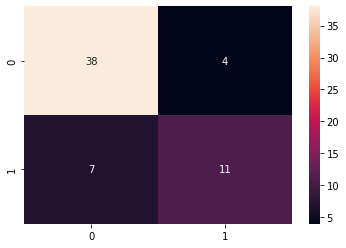

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        42
         1.0       0.73      0.61      0.67        18

    accuracy                           0.82        60
   macro avg       0.79      0.76      0.77        60
weighted avg       0.81      0.82      0.81        60

